# Lorenz 63

In this notebook we'll simulate a Lorenz system. The definition of the model is given by

\begin{align}
    \dot{x} & = \sigma(y-x), \\
    \dot{y} & = \rho x - y - xz, \\
    \dot{z} & = -\beta z + xy,
\end{align}

where $\dot{x}$ denotes a time derivative. The above model is an ODE in three variables. `stochproc` is designed for stochastic processes, and therefore we need to recast the model into a stochastic process form by introducing an artifical noise process as in TODO.

\begin{align}
    X_{t + 1} & = g_x(X_t, Y_t, Z_t; \sigma) + \tau W^x_{t + 1}, \\
    Y_{t + 1} & = g_y(X_t, Y_t, Z_t; \rho) + \tau W^y_{t + 1}, \\
    Z_{t + 1} & = g_z(X_t, Y_T, Z_t; \beta) + \tau W^z_{t + 1},
\end{align}

where we let $g_j$ denote the RK4 method applied to the RHS of the first equations, $W^i_t \sim \mathcal{N}(0, \Delta t)$, and $\tau > 0$ a tuning parameter. Translating this to `stochproc` yields

In [14]:
from stochproc import timeseries as ts, distributions as dists, NamedParameter
import torch


def f(x, s, r, b):
    x1 = s * (x.values[..., 1] - x.values[..., 0])
    x2 = r * x.values[..., 0] - x.values[..., 1] - x.values[..., 0] * x.values[..., 2]
    x3 = - b * x.values[..., 2] + x.values[..., 0] * x.values[..., 1]

    return torch.stack((x1, x2, x3), dim=-1)


initial_values = torch.tensor([-5.91652, -5.52332, 24.5723])

s = NamedParameter("sigma", 10.0)
r = NamedParameter("rho", 28.0)
b = NamedParameter("beta", 8.0 / 3.0)

tau = 1e-2
model = ts.RungeKutta(f, (s, r, b), initial_values, dt=1e-2, tuning_std=tau)

We then sample some time steps and plot the resulting trajectory.

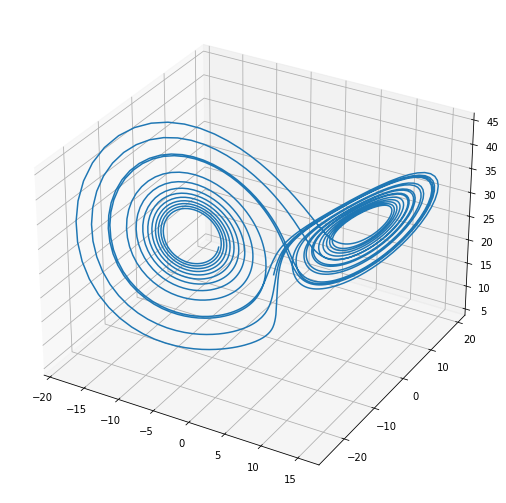

In [38]:
import matplotlib
import matplotlib.pyplot as plt

x = model.sample_path(2_000).numpy()

matplotlib.rcParams['figure.figsize'] = (16, 9)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(x[:, 0], x[:, 1], x[:, 2])